<a href="https://colab.research.google.com/github/sweetiepickle/AI-3-4-23-cifar100/blob/main/AI_3_4_23_cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

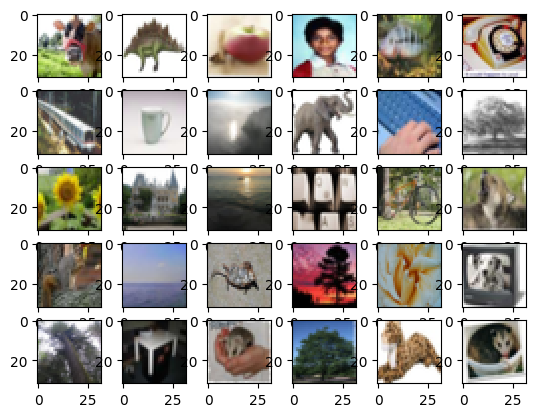

In [ ]:
import matplotlib.pyplot as plt

for i in range(30):
  plt.subplot(5,6,i+1)
  plt.imshow(x_train[i])
plt.show()

In [ ]:
x_train= x_train.reshape((50000, 32*32*3))
x_train= x_train.astype('float32')/255
x_test= x_test.reshape((10000, 32*32*3))
x_test= x_test.astype('float32')/255

In [ ]:
from keras.utils import to_categorical    # Converts a class vector (integers) to binary class matrix.
y_train = to_categorical (y_train,100)
y_test = to_categorical(y_test,100)

print(y_train.shape) 
print(y_test.shape)

(50000, 100)
(10000, 100)


In [ ]:
from keras import models
from keras.models import Sequential    # ann
from keras.layers import Dense    # full connected
model= Sequential()
model.add(Dense(1000, activation= 'relu', input_shape=(32*32*3,)))
model.add(Dense(800, activation= 'relu'))
model.add(Dense(500, activation= 'relu'))
model.add(Dense(100, activation= 'relu'))
model.add(Dense(1, activation= 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              3073000   
                                                                 
 dense_1 (Dense)             (None, 800)               800800    
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 100)               50100     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 4,324,501
Trainable params: 4,324,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile
model.compile(optimizer='Adam',loss='mean_absolute_error',metrics=['accuracy'])
model.fit(x_train, y_train, epochs= 10, batch_size=100)
test_loss, test_acc= model.evaluate(x_test, y_test)
print('Độ chính xác trên tâp kiểm tra: ', test_acc)
print('Hàm mất mát trên tập kiểm tra: ', test_loss)

Epoch 1/10
500/500 [==============================] - 9s 4ms/step - loss: 0.9900 - accuracy: 0.0100
Epoch 2/10
500/500 [==============================] - 2s 4ms/step - loss: 0.9900 - accuracy: 0.0100
Epoch 3/10
500/500 [==============================] - 2s 4ms/step - loss: 0.9900 - accuracy: 0.0100
Epoch 4/10
500/500 [==============================] - 2s 5ms/step - loss: 0.9900 - accuracy: 0.0100
Epoch 5/10
500/500 [==============================] - 2s 5ms/step - loss: 0.9900 - accuracy: 0.0100
Epoch 6/10
500/500 [==============================] - 2s 4ms/step - loss: 0.9900 - accuracy: 0.0100
Epoch 7/10
500/500 [==============================] - 2s 4ms/step - loss: 0.9900 - accuracy: 0.0100
Epoch 8/10
500/500 [==============================] - 2s 4ms/step - loss: 0.9900 - accuracy: 0.0100
Epoch 9/10
500/500 [==============================] - 2s 4ms/step - loss: 0.9900 - accuracy: 0.0100
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.9900 - accuracy: 0.0100

In [ ]:
model.save('/content/drive/MyDrive/model AI/cifar100.h5')